<a href="https://colab.research.google.com/github/aliemadabdo/ML-Basics/blob/main/1_VGG16_covid19_google_drive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import * 
from keras.layers import * 
from keras.callbacks import EarlyStopping
import numpy as np

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_set = train_datagen.flow_from_directory('/content/drive/MyDrive/CovidDataset/Train/',
      target_size=(224, 224), batch_size=32, class_mode='categorical', shuffle=False)

Found 224 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/CovidDataset/Val/',
     target_size=(224, 224), batch_size=32,class_mode='categorical', shuffle=False)

Found 60 images belonging to 2 classes.


In [ ]:
 model=keras.Sequential()
 model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
 model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
 model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
 model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
 model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
 model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
 model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
 model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
 model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
 model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
 model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
 model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
 model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
 model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
 model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
 model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
 model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
 model.add(MaxPool2D(pool_size=(2,2),strides=(2,2),name='vgg16'))
 model.add(Flatten(name='flatten'))
 model.add(Dense(4096, activation='relu', name='fc1'))
 model.add(Dense(4096, activation='relu', name='fc2'))
 model.add(Dense(2, activation='softmax', name='output'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer="sgd", metrics=['accuracy'])

results=model.fit( 
    train_set,  
    epochs=10,
    validation_data=test_set,steps_per_epoch=len(train_set),validation_steps=len(test_set),
    callbacks=keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)      
  )


Epoch 1/10
7/7 [==============================] - 157s 23s/step - loss: 0.6980 - accuracy: 0.3571 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 9s 1s/step - loss: 0.6976 - accuracy: 0.5000 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 3/10
7/7 [==============================] - 9s 1s/step - loss: 0.6970 - accuracy: 0.2143 - val_loss: 0.6923 - val_accuracy: 0.5000
Epoch 4/10
7/7 [==============================] - 9s 1s/step - loss: 0.6966 - accuracy: 0.3571 - val_loss: 0.6921 - val_accuracy: 0.5000
Epoch 5/10
7/7 [==============================] - 9s 1s/step - loss: 0.6963 - accuracy: 0.2143 - val_loss: 0.6919 - val_accuracy: 0.5000
Epoch 6/10
7/7 [==============================] - 9s 1s/step - loss: 0.6963 - accuracy: 0.2143 - val_loss: 0.6917 - val_accuracy: 0.5000
Epoch 7/10
7/7 [==============================] - 9s 1s/step - loss: 0.6960 - accuracy: 0.2545 - val_loss: 0.6915 - val_accuracy: 0.5000
Epoch 8/10
7/7 [======================

In [ ]:
model.evaluate(test_set)

2/2 [==============================] - 2s 522ms/step - loss: 0.6909 - accuracy: 0.9667


[0.6909059882164001, 0.9666666388511658]

In [ ]:
model.save('/content/drive/MyDrive/SavedModels/vgg16_Covid19.h5')

In [ ]:
y_pred= model.predict(test_set)
y_pred

2/2 [==============================] - 2s 635ms/step


array([[0.50072163, 0.49927834],
       [0.5010773 , 0.49892268],
       [0.50050795, 0.49949205],
       [0.5013765 , 0.4986235 ],
       [0.50096005, 0.49903998],
       [0.50098693, 0.49901307],
       [0.5015849 , 0.49841508],
       [0.50064284, 0.49935716],
       [0.50193834, 0.49806166],
       [0.5013453 , 0.49865478],
       [0.5002734 , 0.49972662],
       [0.5014327 , 0.49856734],
       [0.50076044, 0.4992395 ],
       [0.500579  , 0.49942103],
       [0.50125545, 0.49874452],
       [0.49972463, 0.50027543],
       [0.5014467 , 0.4985533 ],
       [0.5009584 , 0.49904165],
       [0.5009189 , 0.49908105],
       [0.50144637, 0.49855363],
       [0.50117594, 0.498824  ],
       [0.5009257 , 0.49907428],
       [0.50119466, 0.4988053 ],
       [0.5008869 , 0.49911302],
       [0.5012739 , 0.4987261 ],
       [0.50118536, 0.4988146 ],
       [0.5008871 , 0.4991129 ],
       [0.5010588 , 0.49894118],
       [0.5014244 , 0.49857563],
       [0.5000535 , 0.4999465 ],
       [0.

In [ ]:
import numpy as np
y_pred1=np.argmax(y_pred,axis=1)
y_pred1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score,  confusion_matrix
print(confusion_matrix(test_set.labels,y_pred1))

accuracy_score(test_set.labels,y_pred1)*100

[[29  1]
 [ 1 29]]


96.66666666666667

In [ ]:
import pandas as pd
df =pd.DataFrame({'filename':test_set.filenames,'y':test_set.classes,'y_pred1':y_pred1})
df

,filename,y,y_pred1
0,Covid/16654_1_1.png,0,0
1,Covid/16654_2_1.jpg,0,0
2,Covid/16654_4_1.jpg,0,0
3,Covid/23E99E2E-447C-46E5-8EB2-D35D12473C39.png,0,0
4,Covid/31BA3780-2323-493F-8AED-62081B9C383B.jpeg,0,0
5,Covid/353889E0-A1E8-4F9E-A0B8-F24F36BCFBFB.jpeg,0,0
6,Covid/4-x-day1.jpg,0,0
7,Covid/41591_2020_819_Fig1_HTML.webp-day10.png,0,0
8,Covid/41591_2020_819_Fig1_HTML.webp-day5.png,0,0
9,Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg,0,0


In [ ]:
misclassification=df[df['y']!=df['y_pred1']]
misclassification

,filename,y,y_pred1
15,Covid/6b44464d-73a7-4cf3-bbb6-ffe7168300e3.ann...,0,1
59,Normal/NORMAL2-IM-1275-0001.jpeg,1,0


In [ ]:
misclassification['y'].count()

2

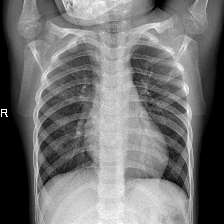

In [ ]:
img1 =tf.keras.utils.load_img('/content/drive/MyDrive/CovidDataset/Val/Normal/NORMAL2-IM-0408-0001.jpeg',target_size =(224,224))
img1

In [ ]:
img =tf.keras.preprocessing.image.img_to_array(img1)
img.shape

(224, 224, 3)

In [ ]:
img = img/255
img_expand =np.expand_dims(img, axis =0)
img_expand.shape

# img_expand=img.reshape(1,img.shape[0],img.shape[1],img.shape[2])
# img_expand.shape

(1, 224, 224, 3)

In [ ]:
y_pred_img = model.predict(img_expand)
y_pred1_img=np.argmax(y_pred_img,axis=1)
print(y_pred_img)

1/1 [==============================] - 1s 778ms/step
[[0.49826935 0.5017307 ]]


In [ ]:
if y_pred_img[0][0] >= 0.5:
    prediction = 'covid'
else:
    prediction = 'normal'
print(prediction)

normal
